In [2]:
import uproot
import numpy as np
import matplotlib.pyplot as plt

if __name__ == '__main__':
    # Path to your ROOT file
    file_path = "/Users/cmj/GEn_Analysis/QE_data_GEN2_sbs100p_nucleon_np_model2.root"

    # Open the ROOT file
    print("Opening ROOT file...")
    file = uproot.open(file_path)

    # Access the TTree
    print("Accessing TTree...")
    tree = file["Tout"]  # Replace "Tout" with the name of the TTree if different

    # Get a list of all the variable names
    variable_names = tree.keys()
    print(f"Available variables: {variable_names}")
    
    # Convert the entire TTree branches to NumPy arrays
    print("Converting TTree branches to NumPy arrays...")
    data = tree.arrays(library="np")  # Load all entries

    print(f"Data loaded: {len(data['Q2'])} entries found")
    print("Script completed successfully.")

Opening ROOT file...
Accessing TTree...
Available variables: ['runnum', 'datetime', 'WCut', 'pCut', 'nCut', 'fiduCut', 'coinCut', 'ebeam', 'nu', 'Q2', 'W2', 'dpel', 'ephi', 'etheta', 'pcentral', 'vz', 'vx', 'vy', 'xtgt', 'ytgt', 'thtgt', 'phtgt', 'thetabend', 'xfp', 'yfp', 'thfp', 'phfp', 'trP', 'trPx', 'trPy', 'trPz', 'ePS', 'xPS', 'eSH', 'xSH', 'ySH', 'eHCAL', 'xHCAL', 'yHCAL', 'xHCAL_exp', 'yHCAL_exp', 'dx', 'dy', 'theta_pq', 'grinch_track', 'grinch_clus_size', 'coin_time', 'hcal_time', 'bbcal_time', 'nhodo_clus', 'hodo_time', 'BPMAx', 'BPMAy', 'Rasterx', 'Rastery', 'Raster2x', 'Raster2y', 'helicity', 'IHWP', 'He3Pol']
Converting TTree branches to NumPy arrays...
Data loaded: 26333210 entries found
Script completed successfully.


In [134]:
Q2 = data["Q2"]
W2 = data["W2"]
cointime = data["coin_time"]
dx = data["dx"]
dy = data ["dy"]
runnum = data["runnum"]
ebeam =data["ebeam"]
dpel =data["dpel"]
import matplotlib.patches as patches

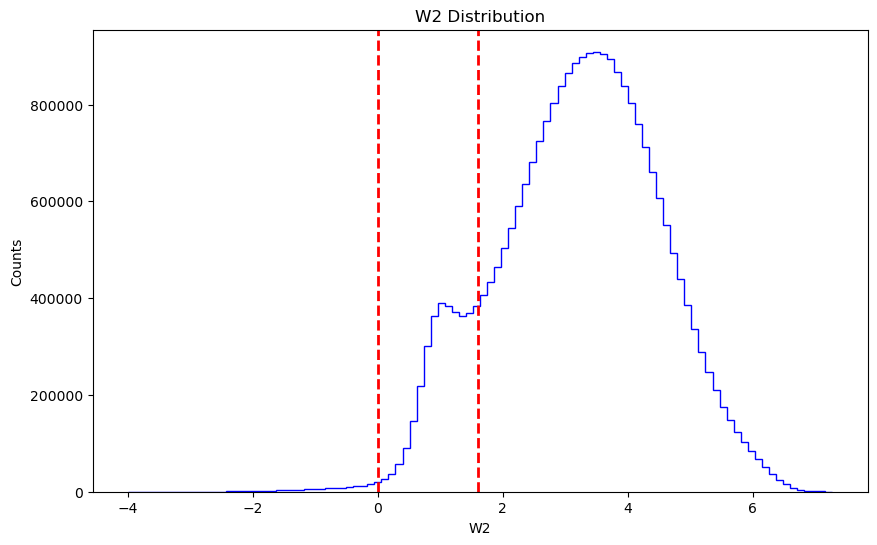

In [113]:
    plt.figure(figsize=(10, 6))
    plt.hist(W2, bins=100, histtype='step', color='blue')
    plt.axvline(x=0, color='red', linestyle='--', linewidth=2)
    plt.axvline(x=1.6, color='red', linestyle='--', linewidth=2)
    plt.title('W2 Distribution')
    plt.xlabel('W2')
    plt.ylabel('Counts')
    plt.show()


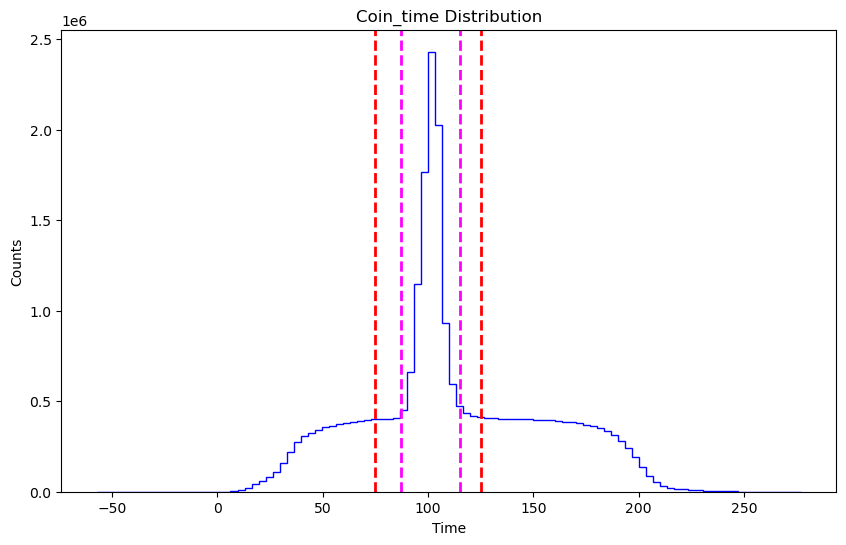

In [126]:
    plt.figure(figsize=(10, 6))
    plt.hist(cointime, bins=100, histtype='step', color='blue')
    plt.axvline(x=75, color='red', linestyle='--', linewidth=2)
    plt.axvline(x=125, color='red', linestyle='--', linewidth=2)
    plt.axvline(x=87, color='magenta', linestyle='--', linewidth=2)
    plt.axvline(x=115, color='magenta', linestyle='--', linewidth=2)
    plt.title('Coin_time Distribution')
    plt.xlabel('Time')
    plt.ylabel('Counts')
    plt.show()

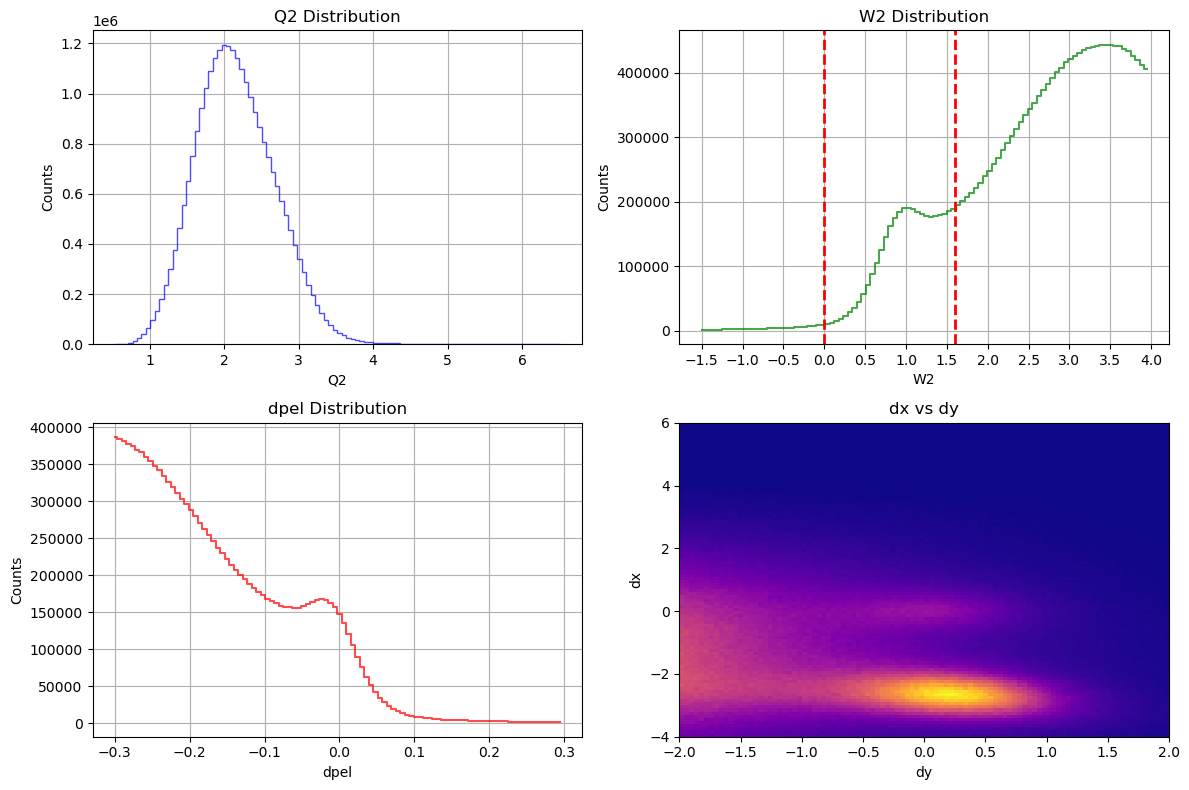

In [114]:
# Example: Plotting histograms
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(Q2, bins=100, range=(min(Q2), max(Q2)), histtype='step', color='blue', alpha=0.7)
plt.title('Q2 Distribution')
plt.xlabel('Q2')
plt.ylabel('Counts')
plt.grid(True)

plt.subplot(2, 2, 2)
# Calculate the appropriate bin width and number of bins
countsW2, bin_edgesW2 = np.histogram(W2, bins=100, range=(-1.5, 4))
#hist_range = (-1.5,6)
x_min = np.floor(-1.5 / 0.5) * 0.5  # Start from the nearest 0.5 below the minimum value
x_max = np.ceil(4 / 0.5) * 0.5   # End at the nearest 0.5 above the maximum value
x_ticksW2 = np.arange(x_min, x_max + 0.5, .5)  # Create ticks every 0.5 units
plt.step(bin_edgesW2[:-1], countsW2, where='mid', color='green', alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--', linewidth=2)
plt.axvline(x=1.6, color='red', linestyle='--', linewidth=2)
#plt.hist(W2, bins=120, range=(-1.5,4) , histtype='step', color='green', alpha=0.7)
plt.xticks(x_ticksW2)
plt.title('W2 Distribution')
plt.xlabel('W2')
plt.ylabel('Counts')
plt.grid(True)

plt.subplot(2, 2, 3)
countsdpel, bin_edgesdpel = np.histogram(dpel, bins=100, range=(-.3, .3))
plt.step(bin_edgesdpel[:-1], countsdpel, where='mid', color='red', alpha=0.7)
#plt.hist(dpel, bins=100, range=(-0.3, 0.3), histtype='step', color='red', alpha=0.7)
plt.title('dpel Distribution')
plt.xlabel('dpel')
plt.ylabel('Counts')
plt.grid(True)

plt.subplot(2, 2, 4)

plt.hist2d(dy, dx, bins=100, range=[[-2, 2], [-4, 6]], cmap='plasma')
plt.title('dx vs dy')
plt.xlabel('dy')
plt.ylabel('dx')
plt.tight_layout()
plt.show()

In [115]:
W2_min=0
W2_max=1.6

cut_indicesW2 =(W2>= W2_min) & (W2<=W2_max)

dx_cut = dx[cut_indicesW2]
dy_cut = dy[cut_indicesW2]

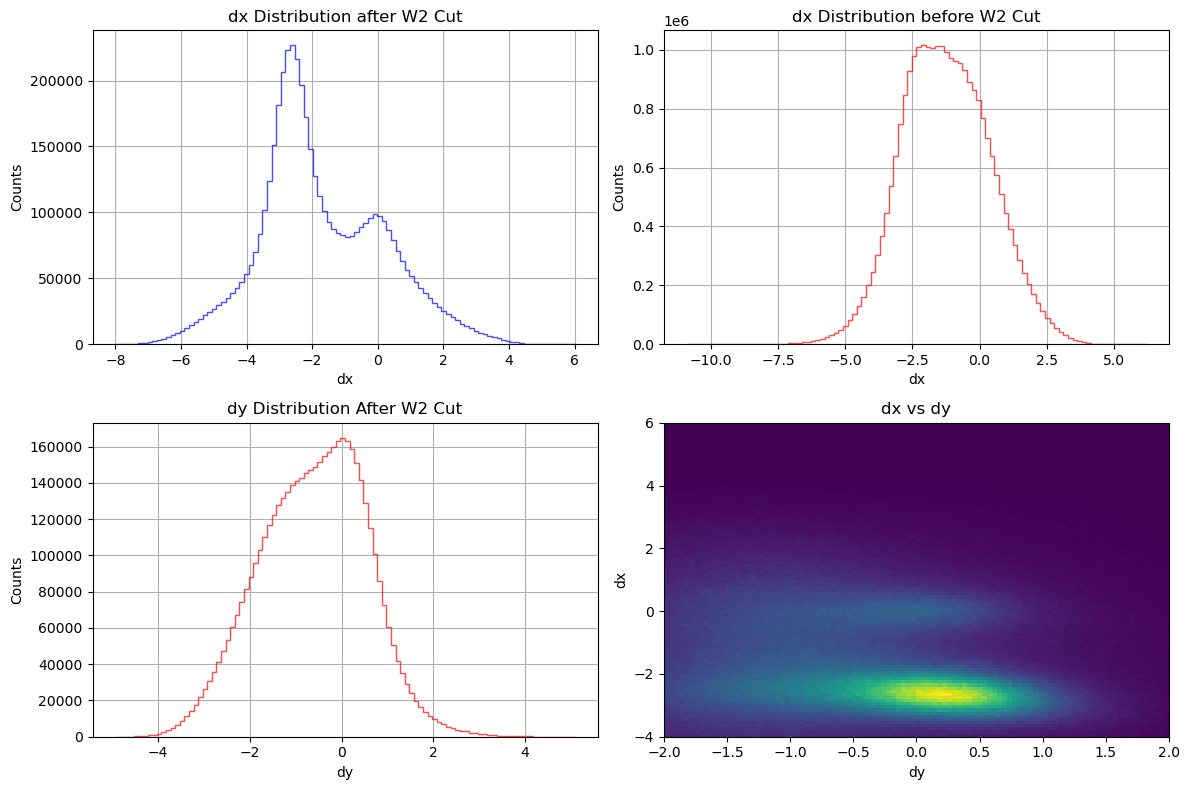

In [107]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(dx_cut, bins=100, range=[-8,6], histtype='step', color='blue', alpha=0.7)
plt.title('dx Distribution after W2 Cut')
plt.xlabel('dx')
plt.ylabel('Counts')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.hist(dx, bins=100, histtype='step', color='red', alpha=0.7)
plt.title('dx Distribution before W2 Cut')
plt.xlabel('dx')
plt.ylabel('Counts')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.hist(dy_cut, bins=100, histtype='step', color='red', alpha=0.7)
plt.title('dy Distribution After W2 Cut')
plt.xlabel('dy')
plt.ylabel('Counts')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.hist2d(dy_cut, dx_cut, bins=100, range=[[-2, 2], [-4, 6]], cmap='viridis')
plt.title('dx vs dy')
plt.xlabel('dy')
plt.ylabel('dx')
plt.tight_layout()
plt.show()

In [108]:
dyn_min=-.4
dyn_max=.6
dxn_min=-.74
dxn_max=.75

cut_indices_n= (dx>=dxn_min) & (dx<=dxn_max) & (dy>=dyn_min) & (dy<=dyn_max)

dxyn_cut=W2[cut_indices_n]

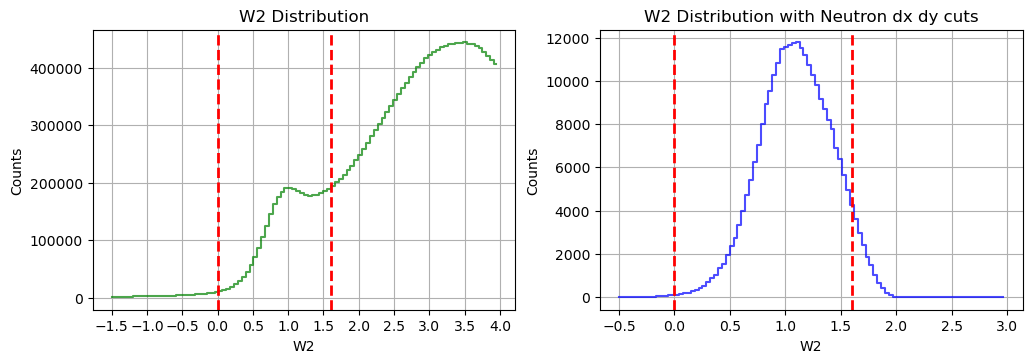

In [123]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
# Calculate the appropriate bin width and number of bins
countsW2, bin_edgesW2 = np.histogram(W2, bins=100, range=(-1.5, 4))
#hist_range = (-1.5,6)
x_min = np.floor(-1.5 / 0.5) * 0.5  # Start from the nearest 0.5 below the minimum value
x_max = np.ceil(4 / 0.5) * 0.5   # End at the nearest 0.5 above the maximum value
x_ticksW2 = np.arange(x_min, x_max + 0.5, .5)  # Create ticks every 0.5 units
plt.step(bin_edgesW2[:-1], countsW2, where='mid', color='green', alpha=0.7)
#plt.hist(W2, bins=120, range=(-1.5,4) , histtype='step', color='green', alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--', linewidth=2)
plt.axvline(x=1.6, color='red', linestyle='--', linewidth=2)
plt.xticks(x_ticksW2)
plt.title('W2 Distribution')
plt.xlabel('W2')
plt.ylabel('Counts')
plt.grid(True)

plt.subplot(2, 2, 2)
# Calculate the appropriate bin width and number of bins
countsdxyn, bin_edgesdxyn = np.histogram(dxyn_cut, bins=100, range=(-.5, 3))
#hist_range = (-1.5,6)
x_min_cut = np.floor(-.5 / 0.5) * 0.5  # Start from the nearest 0.5 below the minimum value
x_max_cut = np.ceil(3 / 0.5) * 0.5   # End at the nearest 0.5 above the maximum value
x_ticksW2_cut = np.arange(x_min_cut, x_max_cut + 0.5, .5)  # Create ticks every 0.5 units
plt.step(bin_edgesdxyn[:-1], countsdxyn, where='mid', color='blue', alpha=0.7)
#plt.hist(W2, bins=120, range=(-1.5,4) , histtype='step', color='green', alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--', linewidth=2)
plt.axvline(x=1.6, color='red', linestyle='--', linewidth=2)
plt.xticks(x_ticksW2_cut)
plt.title('W2 Distribution with Neutron dx dy cuts')
plt.xlabel('W2')
plt.ylabel('Counts')
plt.grid(True)


plt.show()

In [117]:
coin_time_min=75
coin_time_max=125
#These appear to be VERY loose cuts

cutindices_coin= (cointime>=coin_time_min) & (cointime<=coin_time_max)
coincutdx = dx[cutindices_coin & cut_indicesW2]
coincutdy =dy[cutindices_coin & cut_indicesW2]

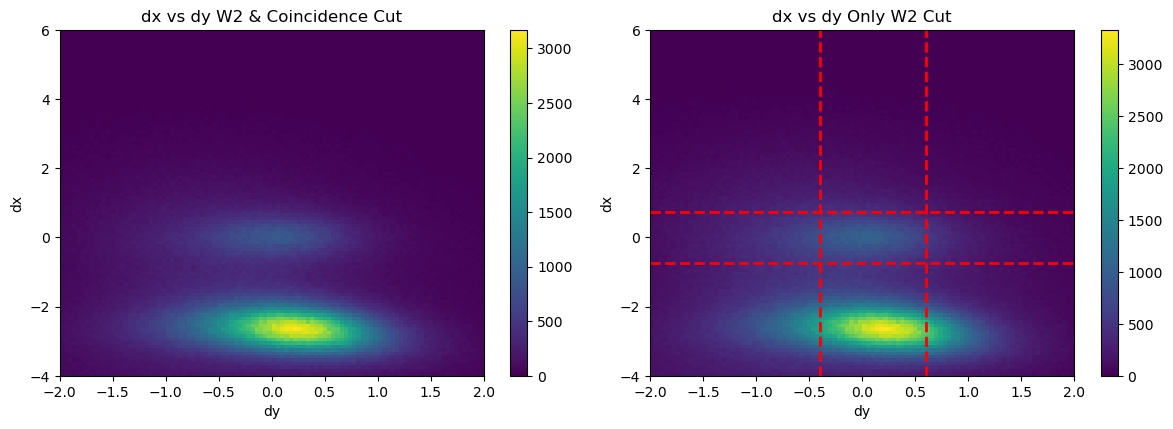

In [122]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
hist=plt.hist2d(coincutdy, coincutdx, bins=100, range=[[-2, 2], [-4, 6]], cmap='viridis')
plt.colorbar(hist[3])
plt.title('dx vs dy W2 & Coincidence Cut')
plt.xlabel('dy')
plt.ylabel('dx')


plt.subplot(2, 2, 2)
hist2=plt.hist2d(dy_cut, dx_cut, bins=100, range=[[-2, 2], [-4, 6]], cmap='viridis')
plt.colorbar(hist2[3])
plt.axvline(x=-.4, color='red', linestyle='--', linewidth=2)
plt.axvline(x=.6, color='red', linestyle='--', linewidth=2)
plt.axhline(y=-.74, color='red', linestyle='--', linewidth=2)
plt.axhline(y=.75, color='red', linestyle='--', linewidth=2)
plt.title('dx vs dy Only W2 Cut')
plt.xlabel('dy')
plt.ylabel('dx')
plt.tight_layout()
plt.show()

In [131]:
coin_time2_min=87
coin_time2_max=115

coincut2=(cointime>=coin_time2_min) & (cointime<=coin_time2_max)
coindx=dx[coincut2&cut_indicesW2]
coindy=dy[coincut2&cut_indicesW2]
cdx=dx[cutindices_coin&cut_indicesW2]
cdy=dy[cutindices_coin&cut_indicesW2]

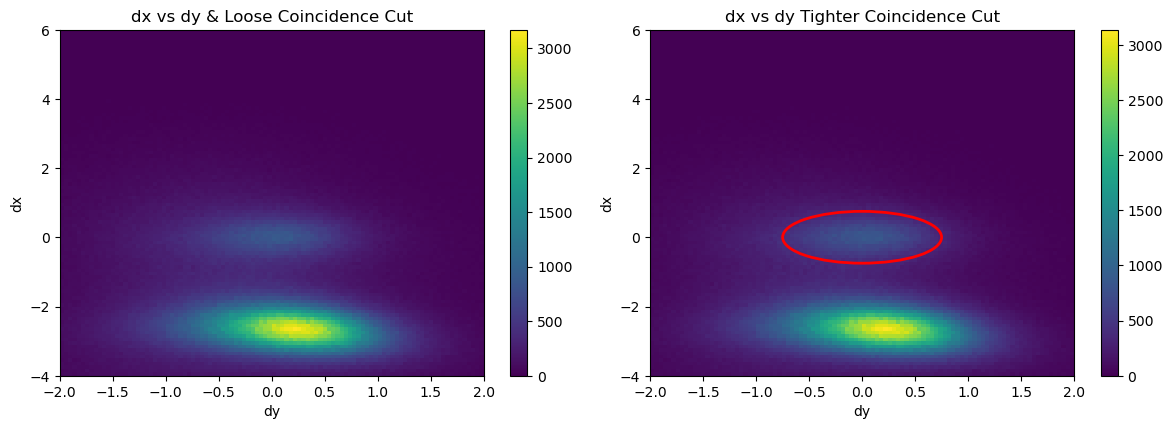

In [142]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
hist=plt.hist2d(cdy, cdx, bins=100, range=[[-2, 2], [-4, 6]], cmap='viridis')
plt.colorbar(hist[3])
plt.title('dx vs dy & Loose Coincidence Cut')
plt.xlabel('dy')
plt.ylabel('dx')

plt.subplot(2, 2, 2)
hist2=plt.hist2d(coindy, coindx, bins=100, range=[[-2, 2], [-4, 6]], cmap='viridis')
plt.colorbar(hist2[3])
ellipse_center_n = (0.0, 0.005)  # Center of the ellipse (dy, dx)
ellipse_width_n = 1.5  # Width of the ellipse (in units of dy)
ellipse_height_n = 1.5  # Height of the ellipse (in units of dx)
ellipse_angle_n = 0  # Angle of rotation in degrees
# Add the ellipse to the plot
ellipse_n = patches.Ellipse(
    ellipse_center_n,
    width=ellipse_width_n,
    height=ellipse_height_n,
    angle=ellipse_angle_n,
    edgecolor='red',
    facecolor='none',  # Keep the ellipse transparent
    linestyle='-',
    linewidth=2
)
plt.gca().add_patch(ellipse_n)
plt.title('dx vs dy Tighter Coincidence Cut')
plt.xlabel('dy')
plt.ylabel('dx')
plt.tight_layout()
plt.show()

In [151]:
ellipse_center_n = (0.0, 0.005)  # Center of the ellipse (dy, dx)
ellipse_width_n = 2  # Width of the ellipse (in units of dy)
ellipse_height_n = 2  # Height of the ellipse (in units of dx)
ellipse_angle_n = 0  # Angle of rotation in degrees

theta_n = np.radians(ellipse_angle_n)

# Ellipse semi-major and semi-minor axes
a_n = ellipse_width_n / 2
b_n = ellipse_height_n / 2
h_n, k_n = ellipse_center_n

# Function to check if points are inside the ellipse
def is_inside_ellipse(x_n, y_n, h_n, k_n, a_n, b_n, theta_n):
    cos_angle = np.cos(theta_n)
    sin_angle = np.sin(theta_n)
    
    # Rotate points to align ellipse with the coordinate axes
    x_prime_n = cos_angle * (x_n - h_n) + sin_angle * (y_n - k_n)
    y_prime_n = -sin_angle * (x_n - h_n) + cos_angle * (y_n - k_n)
    
    # Check if the point lies within the ellipse
    return (x_prime_n ** 2 / a_n ** 2 + y_prime_n ** 2 / b_n ** 2) <= 1

# Filter data points
inside_indices_n = is_inside_ellipse(coindy, coindx, h_n, k_n, a_n, b_n, theta_n)

# Extract only the data inside the ellipse
filtered_coindy_n = coindy[inside_indices_n]
filtered_coindx_n = coindx[inside_indices_n]

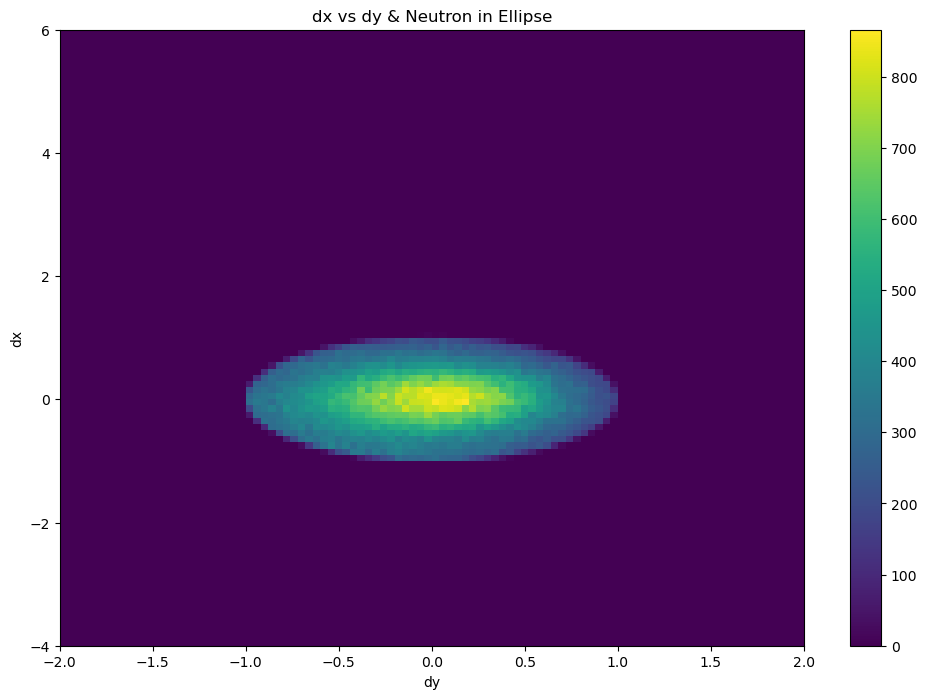

In [152]:
plt.figure(figsize=(12, 8))
hist=plt.hist2d(filtered_coindy_n, filtered_coindx_n, bins=100, range=[[-2, 2], [-4, 6]], cmap='viridis')
plt.colorbar(hist[3])
plt.title('dx vs dy & Neutron in Ellipse')
plt.xlabel('dy')
plt.ylabel('dx')
plt.show()